In [41]:
from IPython.testing import test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [42]:
df = pd.read_csv("/content/sample_data/migration.csv")
df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [43]:
df['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [44]:
df['Measure'] = df['Measure'].map({'Arrivals':0 ,'Departures':1 ,'Net':2})

In [45]:
print(df['Country'].unique())
len(df['Country'].unique())

['Oceania' 'Antarctica' 'American Samoa' 'Australia' 'Cocos Islands'
 'Cook Islands' 'Christmas Island' 'Fiji' 'Micronesia' 'Guam' 'Kiribati'
 'Marshall Islands' 'Northern Mariana Islands' 'New Caledonia'
 'Norfolk Island' 'Nauru' 'Niue' 'New Zealand' 'French Polynesia'
 'Papua New Guinea' 'Pitcairn Island' 'Palau' 'Solomon Islands'
 'French Southern Territories' 'Tokelau' 'Tonga' 'Tuvalu' 'Vanuatu'
 'Wallis and Futuna' 'Samoa' 'Asia' 'Afghanistan' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Brunei Darussalam' 'Bhutan' 'China' 'Georgia' 'Hong Kong'
 'Indonesia' 'India' 'Japan' 'Kyrgyzstan' 'Cambodia' 'North Korea'
 'South Korea' 'Kazakhstan' 'Laos' 'Sri Lanka' 'Myanmar' 'Mongolia'
 'Macau' 'Maldives' 'Malaysia' 'Nepal' 'Philippines' 'Pakistan'
 'Singapore' 'Thailand' 'Tajikistan' 'Timor-Leste' 'Turkmenistan' 'Taiwan'
 'Uzbekistan' 'Vietnam' 'Europe' 'Andorra' 'Albania' 'Austria'
 'Bosnia and Herzegovina' 'Belgium' 'Bulgaria' 'Belarus' 'Switzerland'
 'Czechoslovakia' 'Cyprus' 'Czechia' 'East 

253

In [46]:
#This is label Encoding ,not One - Hot Encoding
df['CountryID'] = pd.factorize(df['Country'])[0]
df['CitID'] = pd.factorize(df['Citizenship'])[0]

df['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [47]:
df.isnull().sum()

,0
Measure,0
Country,0
Citizenship,0
Year,0
Value,72
CountryID,0
CitID,0


In [48]:
df['Value'].fillna(df['Value'].median() ,inplace = True)
df.isnull().sum()

/tmp/ipython-input-3638522010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].median() ,inplace = True)


,0
Measure,0
Country,0
Citizenship,0
Year,0
Value,0
CountryID,0
CitID,0


In [49]:
X = df[['CountryID' ,'Measure' ,'Year' ,'CitID']].values
y = df['Value'].values

X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.3 ,random_state = 42)

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 70 ,max_features = 3 ,max_depth = 5 ,n_jobs = -1)
rf.fit(X_train ,y_train)
rf.score(X_test ,y_test)

0.7360530444110329

In [51]:
X = df[['CountryID','Measure','Year','CitID']]
Y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state = 42)

grouped = df.groupby(['Year']).aggregate({'Value' : 'sum'})
grouped.head()

,Value
Year,
1979,396132.0
1980,440970.0
1981,435476.0
1982,439674.0
1983,417516.0


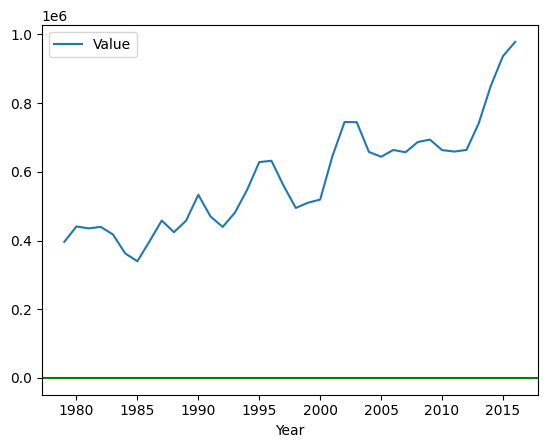

In [52]:
grouped.plot(kind = 'line')
plt.axhline(0 ,color = 'g')
plt.show()

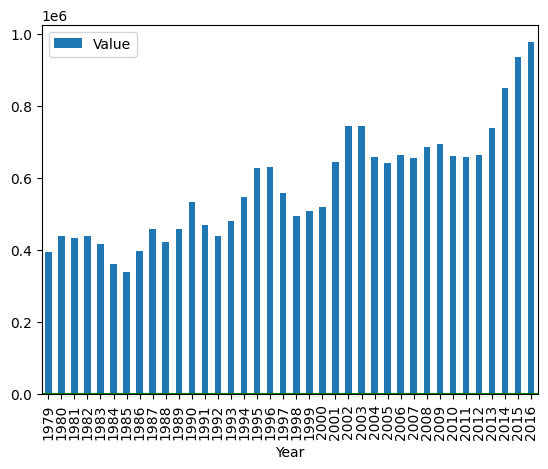

In [53]:
grouped.plot(kind = 'bar')
plt.axhline(0 ,color = 'g')
plt.show()

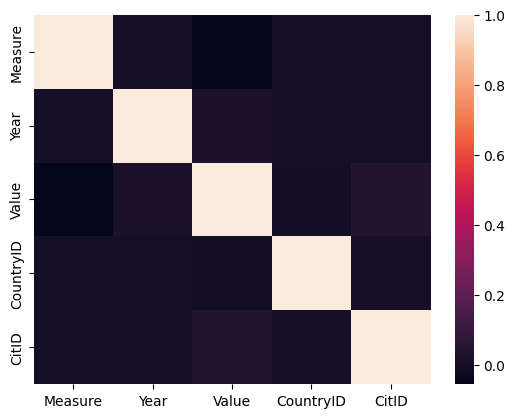

In [54]:
df.drop(['Country' ,'Citizenship'] ,axis = 1 ,inplace = True)
corr = df.corr()

sns.heatmap(corr ,xticklabels = corr.columns.values ,yticklabels = corr.columns.values)
plt.show()